Selected toxin and antitoxin columns: ['Antitoxin CcdA', 'Antitoxin DinJ', 'Antitoxin HigA1', 'Antitoxin LsoB', 'Antitoxin MazE', 'Antitoxin VapB', 'Antitoxin VapB2', 'Antitoxin YefM', 'Antitoxin YobK', 'Antitoxin YokJ', 'Antitoxin epsilon', 'Endoribonuclease toxin MazF', 'Putative toxin HigB2', 'Toxin CcdB', 'Toxin HigB-1', 'Toxin HigB-2', 'Toxin PezT', 'Toxin RTX-I translocation ATP-binding protein', 'Toxin RelG', 'Toxin RelK', 'Toxin YoeB', 'Toxin zeta', 'mRNA interferase toxin RelE', 'mRNA interferase toxin YafQ']


/tmp/ipykernel_1550/3006042787.py:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


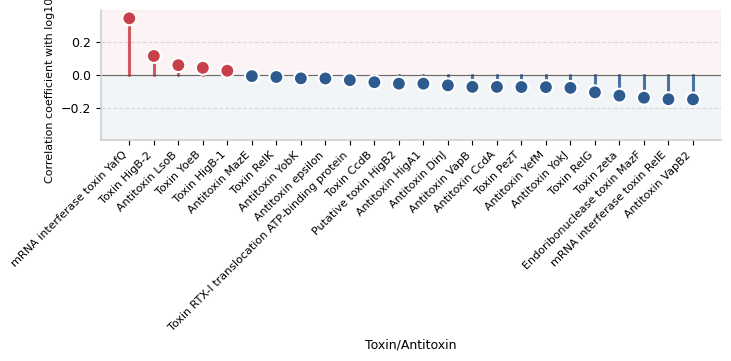

Plot saved to: /mnt/e/Figure_files/Fig_5/Final/New folder/New folder/Final_folder/Human_data_final/Lollipop_Plot_PointBiserial_Toxins_vs_PCN_Styled_Excluding_Total_toxins.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from matplotlib.ticker import MaxNLocator

# Load the cleaned dataset
file_path = 'Figure_5G_data.csv'
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Select toxin and antitoxin columns (already binary), excluding 'Total_toxins'
toxin_columns = [col for col in df.columns if ('toxin' in col.lower() or 'antitoxin' in col.lower()) and col != 'Total_Toxins']
print("Selected toxin and antitoxin columns:", toxin_columns)

# Take log10 of PCN values (no added small constant)
df['log10_PCN'] = np.log10(df['PCN'])  # No + 1e-10

# Calculate the point-biserial correlation coefficient for each toxin/antitoxin with 'log10_PCN'
point_biserial_correlations = []
for toxin in toxin_columns:
    # Calculate the point-biserial correlation coefficient
    corr, _ = pointbiserialr(df[toxin], df['log10_PCN'])
    point_biserial_correlations.append((toxin, corr))

# Create a DataFrame with toxin names and their corresponding correlation values
correlation_df = pd.DataFrame(point_biserial_correlations, columns=['Toxin/Antitoxin', 'Point-Biserial Correlation'])

# Sort by correlation values for better visualization
correlation_df = correlation_df.sort_values(by='Point-Biserial Correlation', ascending=False)

# Create plot with enclosed styling (horizontal orientation)
plt.figure(figsize=(8, 2))  # Wider aspect ratio for horizontal layout
ax = plt.gca()

# Create position index for x-axis
x_pos = np.arange(len(correlation_df))

# Create color mapping (Red for positive, Blue for negative)
colors = np.where(correlation_df['Point-Biserial Correlation'] >= 0, '#C74049', '#2D5B8F')  # Red for positive, blue for negative

# Create vertical stems
for i, val in enumerate(correlation_df['Point-Biserial Correlation']):
    ax.plot([i, i], [0, val],  # Vertical stems
            color=colors[i], 
            linewidth=2.2, 
            alpha=0.85,
            solid_capstyle='round')

# Create lollipop heads with outline
ax.scatter(x_pos, correlation_df['Point-Biserial Correlation'], 
           s=100, 
           c=colors, 
           edgecolor='white',
           linewidth=1.5,
           zorder=10)

# Add zero reference line
ax.axhline(0, color='#404040', linestyle='-', linewidth=0.8, alpha=0.7)

# Add labels and title
ax.set_xticks(x_pos)
ax.set_xticklabels(correlation_df['Toxin/Antitoxin'], fontsize=8, rotation=45, ha='right')
ax.set_ylabel('Correlation coefficient with log10(PCN)', fontsize=8)
ax.set_xlabel('Toxin/Antitoxin', fontsize=9)

# Configure axis and spines
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.tick_params(axis='y', labelsize=9)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#d0d0d0')
ax.spines[['left', 'bottom']].set_linewidth(1.2)

# Add subtle grid
ax.grid(True, axis='y', linestyle='--', alpha=0.25, color='gray')

# Set symmetric y-limits
max_abs = max(abs(correlation_df['Point-Biserial Correlation'].min()), abs(correlation_df['Point-Biserial Correlation'].max()))
ax.set_ylim(-max_abs * 1.15, max_abs * 1.15)

# Add colored value bands
ax.axhspan(0, max_abs * 1.15, alpha=0.06, color='#C74049', zorder=0)
ax.axhspan(-max_abs * 1.15, 0, alpha=0.06, color='#2D5B8F', zorder=0)

# Adjust layout with extra space for labels
plt.subplots_adjust(bottom=0.25, top=0.9)  # Extra space for x-labels
plt.tight_layout()

# Save and display plot
plot_path = 'Figure_5G.pdf'
plt.savefig(plot_path, dpi=1200, bbox_inches='tight')
plt.show()

print(f"Plot saved to: {plot_path}")


Selected mobility gene columns: ['MOBF', 'MOBT', 'MOBH', 'MOBC', 'MOBQ', 'MOBP2', 'MOBP3', 'MOBV', 'MOBP1', 'MOBB']


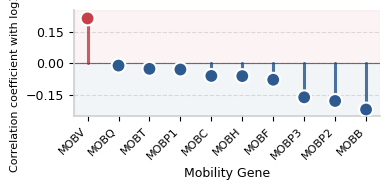

Plot saved to: /mnt/e/Figure_files/Fig_5/Final/New folder/New folder/Final_folder/Human_data_final/Lollipop_Plot_PointBiserial_MobilityGenes_vs_PCN_HumanGut.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from matplotlib.ticker import MaxNLocator

# Load the dataset
file_path = 'Figure_5H_data.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Filter only for human gut plasmids based on ecosystem column
gut_keywords = [
    'Host-associated;Mammals: Human;Digestive system;Large intestine;Fecal',
    'Host-associated;Mammals: Human;Digestive system;Large intestine;Colon mucosa'
]
df = df[df['ecosystem'].isin(gut_keywords)]

# Take log10 of PCN
df['log10_PCN'] = np.log10(df['PCN'])

# Select mobility gene columns (excluding total count if present)
mob_columns = [col for col in df.columns if 'mob' in col.lower() and col != 'Total_mob_genes']
print("Selected mobility gene columns:", mob_columns)

# Calculate point-biserial correlation between each mobility gene and log10(PCN)
correlations = []
for gene in mob_columns:
    corr, _ = pointbiserialr(df[gene], df['log10_PCN'])
    correlations.append((gene, corr))

# Create DataFrame
cor_df = pd.DataFrame(correlations, columns=['Mobility Gene', 'Point-Biserial Correlation'])
cor_df = cor_df.sort_values(by='Point-Biserial Correlation', ascending=False)

# Plot
plt.figure(figsize=(4, 2))
ax = plt.gca()
x_pos = np.arange(len(cor_df))
colors = np.where(cor_df['Point-Biserial Correlation'] >= 0, '#C74049', '#2D5B8F')

# Vertical stems
for i, val in enumerate(cor_df['Point-Biserial Correlation']):
    ax.plot([i, i], [0, val], color=colors[i], linewidth=2.2, alpha=0.85, solid_capstyle='round')

# Lollipop heads
ax.scatter(x_pos, cor_df['Point-Biserial Correlation'], s=100, c=colors, edgecolor='white', linewidth=1.5, zorder=10)

# Reference line
ax.axhline(0, color='#404040', linestyle='-', linewidth=0.8, alpha=0.7)

# Axis setup
ax.set_xticks(x_pos)
ax.set_xticklabels(cor_df['Mobility Gene'], fontsize=8, rotation=45, ha='right')
ax.set_xlabel('Mobility Gene', fontsize=9)
ax.set_ylabel('Correlation coefficient with log10(PCN)', fontsize=8)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.tick_params(axis='y', labelsize=9)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#d0d0d0')
ax.spines[['left', 'bottom']].set_linewidth(1.2)
ax.grid(True, axis='y', linestyle='--', alpha=0.25, color='gray')

# Symmetric limits
max_abs = max(abs(cor_df['Point-Biserial Correlation'].min()), abs(cor_df['Point-Biserial Correlation'].max()))
ax.set_ylim(-max_abs * 1.15, max_abs * 1.15)
ax.axhspan(0, max_abs * 1.15, alpha=0.06, color='#C74049', zorder=0)
ax.axhspan(-max_abs * 1.15, 0, alpha=0.06, color='#2D5B8F', zorder=0)

# Layout
plt.subplots_adjust(bottom=0.25, top=0.9)
plt.tight_layout()

# Save
save_path = 'Figure_5H.pdf'
plt.savefig(save_path, dpi=1200, bbox_inches='tight')
plt.show()

print(f"Plot saved to: {save_path}")
